<h1>False Discoveries occur Early on the Lasso Path</h1>

<i>Antoine SIMOULIN</h2>

<h2>Requirements</h2>

In [32]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.datasets import make_classification
from itertools import cycle
from sklearn import preprocessing
from sklearn import linear_model
import matplotlib.gridspec as gridspec
from scipy.stats import norm

<h2>Load datasets</h2>

In [33]:
# data, target = make_classification(n_samples=1000, n_features=1000)
# data, target = datasets.load_breast_cancer(return_X_y=True)
# print(data.shape)
# data normalization
# scaler = preprocessing.StandardScaler()
# data = scaler.fit_transform(data)

In [55]:
def TPP_FDP(N,p,epsi,beta_value,noise,sigma_2,algo):
    # gaussian data
    # y = X*beta + z
    #data, _ = datasets.load_breast_cancer(return_X_y=True) # true data
    #data, _ = make_classification(n_samples=1000, n_features=1000)
    #N = data.shape[0]
    #p = data.shape[1]
    #X = data
    X = np.random.randn(N, p) # standard normal distribution
    beta = np.zeros((p,1))
    lim = int(epsi*N)
    beta[:lim] = beta_value
    y = np.dot(X,beta)
    if noise:
        z = np.random.normal(0,sigma_2,N)
        y += z[:,None]
    

    if algo=='lasso':
        alphas, coefs, _ = linear_model.lasso_path(X, y, n_alphas=1000)
        coefs = coefs.reshape(coefs.shape[1:])
        color='b'
        
    if algo=='enet':
        alphas, coefs, _ = linear_model.enet_path(X, y, n_alphas=1000)
        coefs = coefs.reshape(coefs.shape[1:])
        color='orange'

    FDP = np.zeros(alphas.shape[0])
    TPP = np.zeros(alphas.shape[0])

    for i in range(alphas.shape[0]):
        # false discovery proportion
        V = np.sum(np.array(coefs[:,i]!=0)[:,None].astype(int)*np.array(beta==0).astype(int))
        l = np.array(np.array(coefs[:,i]!=0)[:,None])
        FDP[i] = V/max(np.sum(l),1)

        # true positive proportion
        T = np.sum(np.array(coefs[:,i]!=0)[:,None].astype(int)*np.array(beta!=0).astype(int))
        k = np.asarray(np.array(beta!=0))
        TPP[i] = T/max(np.sum(k),1)
        
    # save figure
    fig = plt.figure(figsize=(10, 6)) 
    plt.scatter(TPP,FDP,c=color,s=7)
    plt.xlabel('TPP')
    plt.ylabel('FDP')
    plt.savefig('TPP_FDP_%s%%_%s_%s_%s_%s.png' %(epsi,N,p,noise,algo),bbox_inches='tight')
    plt.close()
    
    fig = plt.figure(figsize=(20, 5)) 
    gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1]) 
    ax0 = plt.subplot(gs[0])
    ax0.scatter(alphas, FDP, label='FDP', s=7)
    ax0.set_title('false discovery proportion')
    ax0.set_ylabel('FDP')
    ax0.set_xlabel('alpha')
    ax1 = plt.subplot(gs[1])
    ax1.scatter(alphas, TPP, label='TPP', s=7)
    ax1.set_ylabel('TPP')
    ax1.set_xlabel('alpha')
    ax1.set_title('true positive proportion')
    ax2 = plt.subplot(gs[2])
    ax2.scatter(TPP, FDP, s=7)
    ax2.set_ylabel('FDP')
    ax2.set_xlabel('TPP')
    ax2.set_title('FDP/TPP')
    plt.savefig('TPP_FDP_all_%s%%_%s_%s_%s_%s.png' %(epsi,N,p,noise,algo),bbox_inches='tight')
    plt.close()
    
    return TPP, FDP, alphas

In [22]:
TPP_enet, FDP_enet, alphas_enet = TPP_FDP(N=1000,p=1010,epsi=0.2,beta_value=1,noise=False,sigma_2=0.1,algo='enet')
# param :
# N : datasize
# p : features number
# b : proportion of non-zero coefficient in beta
# beta_value : value of non-zero coefficients in beta
# noise : boolean value to add gaussian noise or not
# sigma_2 : noise standard deviation
# algo : algo type, 'enet' for elastic net or 'lasso' for lasso

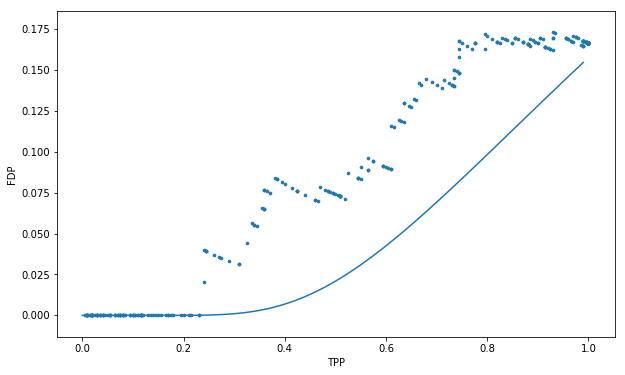

In [53]:
TPP_lasso, FDP_lasso, alphas_lasso = TPP_FDP(N=1000,p=1010,epsi=0.2,beta_value=1,noise=False,sigma_2=0.1,algo='lasso')

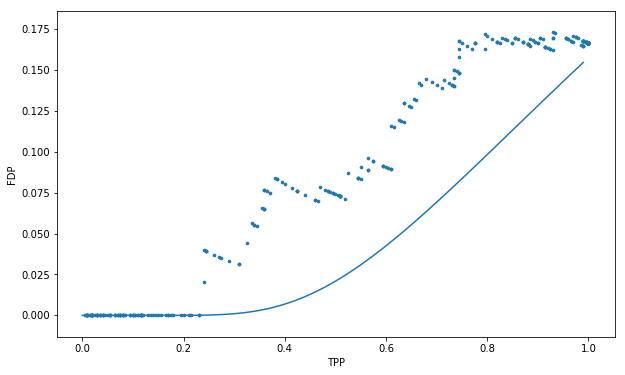

In [54]:
absX, X = fdrlasso_py(delta=1, epsi=0.2)
fig = plt.figure(figsize=(10, 6)) 
plt.scatter(TPP_lasso, FDP_lasso, label='lasso', s=7)
plt.xlabel('TPP')
plt.ylabel('FDP')
#plt.scatter(TPP_enet, FDP_enet, label='enet', s=7)
plt.plot(X,absX, label='boundary')
plt.show()

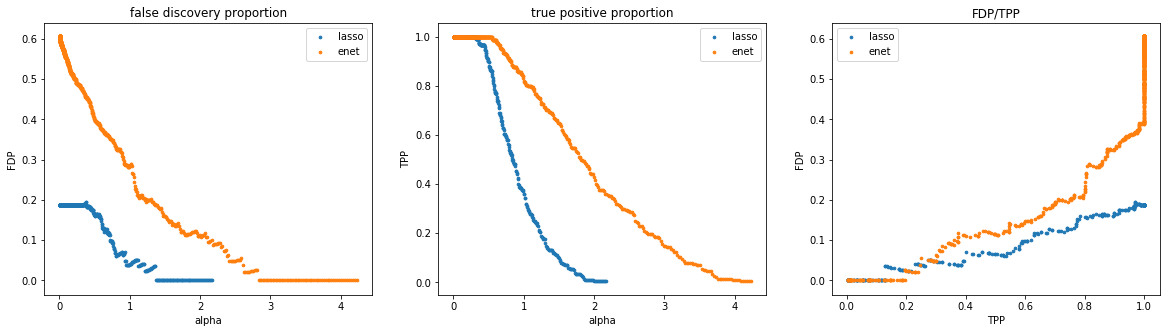

In [56]:
TPP_enet, FDP_enet, alphas_enet = TPP_FDP(N=1000,p=1010,epsi=0.2,beta_value=1,noise=False,sigma_2=0.9,algo='enet')
TPP_lasso, FDP_lasso, alphas_lasso = TPP_FDP(N=1000,p=1010,epsi=0.2,beta_value=1,noise=False,sigma_2=0.9,algo='lasso')
# absX,X = fdrlasso_py(tpp=absX[t], delta=1, epsi=0.2)
fig = plt.figure(figsize=(20, 5)) 
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1]) 
ax0 = plt.subplot(gs[0])
ax0.scatter(alphas_lasso, FDP_lasso, label='lasso', s=7)
ax0.scatter(alphas_enet, FDP_enet, label='enet', s=7)
ax0.legend(loc=0)
ax0.set_title('false discovery proportion')
ax0.set_ylabel('FDP')
ax0.set_xlabel('alpha')
ax1 = plt.subplot(gs[1])
ax1.scatter(alphas_lasso, TPP_lasso, label='lasso', s=7)
ax1.scatter(alphas_enet, TPP_enet, label='enet', s=7)
ax1.legend(loc=0)
ax1.set_ylabel('TPP')
ax1.set_xlabel('alpha')
ax1.set_title('true positive proportion')
ax2 = plt.subplot(gs[2])
ax2.scatter(TPP_lasso, FDP_lasso, label='lasso', s=7)
ax2.scatter(TPP_enet, FDP_enet, label='enet', s=7)
# ax2.plot(X,absX, label='boundary')
ax2.legend(loc=0)
ax2.set_ylabel('FDP')
ax2.set_xlabel('TPP')
ax2.set_title('FDP/TPP')
plt.savefig('TPP_FDP_all_lasso_enet.png',bbox_inches='tight')
plt.show()

In [46]:
# python translated function from the matlab one downloaded from :
# https://github.com/wjsu/fdrlasso/blob/master/fdrlasso.m
# Copyright @ Weijie Su, Malgorzata Bogdan, and Emmanuel Candes, 2015

def fdrlasso(tpp, delta, epsi):
# This function calculates the Lasso trade-off curve given tpp (true
# positive proportion), delta = n/p (shape of the design matrix, or
# subsampling rate), and epsi = k/p (sparsity ratio).
# All tpp, delta, and epsi are between 0 and 1; if the
# pair (delta, epsi) is above the Donoho-Tanner phase transition, tpp
# should be no larger than u^\star = powermax(delta, epsi)

    if tpp > powermax(delta, epsi):
        print('Invalid input!')
        return

    if tpp == 0:
        q = 0
        return

    # make stepsize smaller for higher accuracy
    stepsize = 0.1
    tmax = max(10, np.sqrt(delta/epsi/tpp) + 1)
    tmin = tmax - stepsize

    while tmin > 0:
        if lsandwich(tmin, tpp, delta, epsi) < rsandwich(tmin, tpp):
            break
        tmax = tmin
        tmin = tmax - stepsize

    if tmin <= 0:
        stepsize = stepsize/100;
        tmax = max(10, sqrt(delta/epsi/tpp) + 1);
        tmin = tmax - stepsize;
        while tmin > 0:
            if lsandwich(tmin, tpp, delta, epsi) < rsandwich(tmin, tpp):
                break
            tmax = tmin
            tmin = tmax - stepsize

    diff = tmax - tmin
    while diff > 1e-6:
        tmid = 0.5*tmax + 0.5*tmin;
        if lsandwich(tmid, tpp, delta, epsi) > rsandwich(tmid, tpp):
            tmax = tmid
        else:    
            tmin = tmid
        diff = tmax - tmin

    t = (tmax + tmin)/2
    q = 2*(1-epsi)*norm.cdf(-t)/(2*(1-epsi)*norm.cdf(-t) + epsi*tpp)
    
    return q

def lsandwich(t, tpp, delta, epsi):
    Lnume = (1-epsi)*(2*(1+t**2)*norm.cdf(-t) - 2*t*norm.pdf(t)) + epsi*(1+t**2) - delta;
    Ldeno = epsi*((1+t**2)*(1-2*norm.cdf(-t)) + 2*t*norm.pdf(t));
    L = Lnume/Ldeno;
    return L

def rsandwich(t, tpp):
    R = (1 - tpp)/(1 - 2*norm.cdf(-t));
    return R

# highest power for delta < 1 and epsilon > epsilon_phase
def powermax(delta, epsilon):
    if delta >= 1:
        power = 1
        return power
    
    epsilon_star = epsilonDT(delta);
    if epsilon <= epsilon_star:
        power = 1
        return power
    
    power = (epsilon - epsilon_star)*(delta - epsilon_star)/epsilon/(1 - epsilon_star) + epsilon_star/epsilon
    
    return power

def epsilonDT(delta):
    minus_f = lambda x : -(1+2/delta*x*norm.pdf(x) - 2/delta*(1+x**2)*norm.cdf(-x))/(1+x^2-2*(1+x**2)*norm.cdf(-x)+2*x*norm.pdf(x))*delta;
    alpha_phase = fminbnd(minus_f, 0, 8);
    epsi = -feval(minus_f, alpha_phase);
    return epsi

def fdrlasso_py(delta,epsi):
    Nmax =100
    X = np.zeros(Nmax)
    absX = np.zeros(Nmax)
    for t in range(1,Nmax):
        absX[t] = t/Nmax
        X[t] = fdrlasso(tpp=absX[t], delta=1, epsi=0.2)
    
    return X,absX

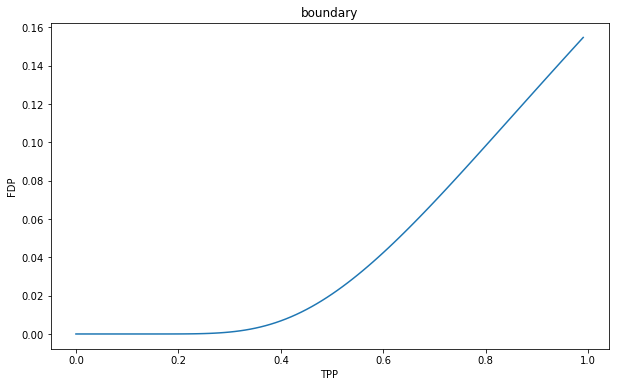

In [47]:
absX, X = fdrlasso_py(delta=1, epsi=0.2)
fig = plt.figure(figsize=(10, 6)) 
plt.plot(X,absX)
plt.xlabel('TPP')
plt.ylabel('FDP')
plt.title('boundary')
plt.show()